# **Deep Learning Part- II with Mohammad Wasiq**


In [1]:
# import the libraries
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

In [2]:
(X_train, y_train), (X_test, y_test)= fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
# Normalizing the data
X_train= X_train/255.0
X_test= X_test/255.0

In [5]:
# Reshaping the data
X_train= X_train.reshape(-1, 28*28)
X_test= X_test.reshape(-1, 28*28)

# $$ANN$$

In [8]:
# Object instance of zsequential class
model= tf.keras.models.Sequential()

# Add layers to the model
# units --> number of neurons in the layer
# input shape --> number of features as input to each neuron
model.add(tf.keras.layers.Dense(units= 128, activation= 'relu', input_shape= (784,)))

# Add another layer to the model
model.add(tf.keras.layers.Dense(units= 10, activation= 'softmax'))

# Compile the model
model.compile(optimizer= 'adam',
              loss= 'sparse_categorical_crossentropy',
              metrics= ['sparse_categorical_accuracy'])

In [10]:
# train the model
model.fit(X_train, y_train, epochs= 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4964 - sparse_categorical_accuracy: 0.8250
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3724 - sparse_categorical_accuracy: 0.8655
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3319 - sparse_categorical_accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3097 - sparse_categorical_accuracy: 0.8866
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2937 - sparse_categorical_accuracy: 0.8910


In [12]:
# test the model
test_loss, test_accuracy= model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3527 - sparse_categorical_accuracy: 0.8715


# $$CNN$$

In [13]:
# import the require libraries
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import fashion_mnist
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.utils import to_categorical

In [21]:
(train_X, train_Y), (test_X, test_Y)= fashion_mnist.load_data()

In [15]:
train_X.shape

(60000, 28, 28)

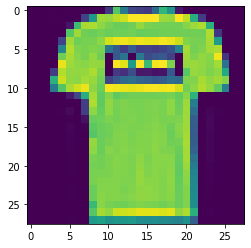

In [16]:
# Data visualization
plt.imshow(train_X[1])

In [17]:
# Normalizing the data
train_X= train_X.astype('float32')/255
test_X= test_X.astype('float32')/255

In [18]:
# Reshaping the data
train_X= train_X.reshape(-1, 28*28, 1)
test_X= test_X.reshape(-1, 28*28, 1)

In [22]:
# changing our output to categorical
train_Y_one_hot= to_categorical(train_Y)
test_Y_one_hot= to_categorical(test_Y)

In [23]:
# Object instance of zsequential class
model= Sequential()

# Must define the input shape in the first layer of the neural network
# Convolutions layers
# Filters --> learned during training and provide brightness to pixel on the basis of there weights
# Kernel size --> height and weight of 2D conv window or
# A number specifying both the height and weight of the (square) convolution window.
model.add(Conv2D(64, (3,3), input_shape= (28, 28, 1)))
model.add(Activation('relu'))

# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Convolutions layer
model.add(Conv2D(64, (3,3)))
model.add(Activation('relu'))

# MaxPooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten to make our model 1D
model.add(Flatten())

# fully connected layer
model.add(Dense(64))

# Output layer
model.add(Dense(10))
model.add(Activation('softmax'))

# Model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 activation (Activation)     (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [24]:
# Compiling Model
model.compile(loss= keras.losses.categorical_crossentropy, 
              optimizer= keras.optimizers.Adam(),
              metrics= ['accuracy'])

In [25]:
# Fitting Model
model.fit(train_X, train_Y_one_hot, epochs= 3) 

Epoch 1/3
1875/1875 [==============================] - 124s 66ms/step - loss: 0.7472 - accuracy: 0.7978
Epoch 2/3
1875/1875 [==============================] - 108s 58ms/step - loss: 0.4232 - accuracy: 0.8481
Epoch 3/3
1875/1875 [==============================] - 118s 63ms/step - loss: 0.3656 - accuracy: 0.8695


In [26]:
# testing our model
test_loss, test_acc= model.evaluate(test_X, test_Y_one_hot)
print("Test Loss: ", test_loss)
print("Test Accuracy: ", test_acc)

313/313 [==============================] - 4s 13ms/step - loss: 0.3762 - accuracy: 0.8690
Test Loss:  0.37617945671081543
Test Accuracy:  0.8690000176429749


In [27]:
# Prediction
predictions= model.predict(test_X)
print(np.argmax(np.round(predictions[0])))

313/313 [==============================] - 4s 13ms/step
9


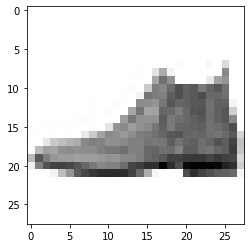

In [28]:
plt.imshow(test_X[0].reshape(28, 28), cmap= plt.cm.binary)
plt.show()

# $$RNN$$
* Output from the previous step are fed as input to the current step
* Use its internal memory to handle weights and biases from the previous steps or previous weights.

***Problems with Gradient descent:***
* Poor Performance
* Low Accuracy
* Long Training Period

Exploding gradient: high importance to weights

Vanishing gradient: small value of GD(LSTM)

In [61]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [62]:
paragraph1= np.random.random((20, 10, 50)).astype(np.float32)
paragraph2= np.random.random((20, 10, 50)).astype(np.float32)
paragraph3= np.random.random((20, 10, 50)).astype(np.float32)

In [63]:
lstm_layer= tf.keras.layers.LSTM(64, stateful= True)
output= lstm_layer(paragraph1)
output= lstm_layer(paragraph2)
output= lstm_layer(paragraph3)

In [64]:
# reset_states() will reset the cached state to the original initial_state.
# If no initial_state was provided, zero-states will be used by default

lstm_layer.reset_states()

### **MNIST**

In [65]:
batch_size= 64
# Each MNIST image batch is a tensor of shape (batch_size, 28, 28).
# Each input sequence will be of size (28, 28) (height of treated like time)
input_dim= 28

units = 64
output_size = 10 # labels are from 0 to 9

# Build the RNN model
def build_model(allow_cudnn_kernel=True):
  # CuDNN is only available at the layer level, and not at the cell level.
  # This means `LSTM(units)` will use the CuDNN kernel,
  # while RNN(LSTMCell(units)) will run on non-CuDNN kernel. www 
  # cuDNN created by nvidia to accelerate deep learning by optimised GPU
  if allow_cudnn_kernel:
    # The LSTM layer with default options uses CuDNN.
    lstm_layer = keras.layers.LSTM(units, input_shape=(None, input_dim))
  else:
    # Wrapping a LSTMCell in a RNN layer will not use CuDNN.
    lstm_layer = keras.layers.RNN(
        keras.layers.LSTMCell(units), input_shape=(None, input_dim)
        )
  model = keras.models.Sequential(
      [
          lstm_layer,
       keras.layers.BatchNormalization(),
       keras.layers. Dense (output_size),
      ]
  )
  return model

In [67]:
mnist= keras.datasets.mnist

(x_train, y_train), (x_test, y_test)= mnist.load_data()

x_train= x_train/255.0
x_test= x_test/255.0

sample, sample_label= x_train[0], y_train[0]

 # $$CUDNN$$

In [68]:
model= build_model(allow_cudnn_kernel=True)

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer="sgd",
    metrics=["accuracy"],
)

model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 22s 21ms/step - loss: 0.9854 - accuracy: 0.6816 - val_loss: 0.5716 - val_accuracy: 0.8129


# $$NON-CUDNN$$

In [69]:
noncudnn_model= build_model(allow_cudnn_kernel=False)

noncudnn_model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
    optimizer="sgd",
    metrics=["accuracy"],
)

noncudnn_model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=1
)

938/938 [==============================] - 22s 22ms/step - loss: 0.9699 - accuracy: 0.6898 - val_loss: 0.5842 - val_accuracy: 0.8168


Predicted result is: [3], target result is: 5


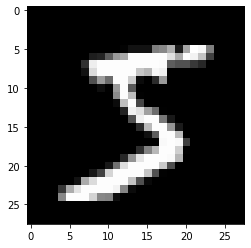

In [76]:
import matplotlib.pyplot as plt

with tf.device("CPU:0"):
  cpu_model= build_model(allow_cudnn_kernel=True)
  cpu_model.set_weights(model.get_weights())
  result= tf.argmax(cpu_model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
  print(
      "Predicted result is: %s, target result is: %s"  % (result.numpy(), sample_label)
  )
  plt.imshow(sample, cmap= plt.get_cmap("gray"))

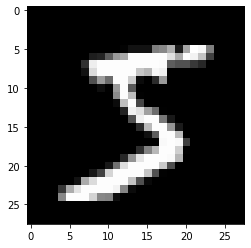

In [75]:
plt.imshow(sample, cmap= plt.get_cmap("gray"))

# $$LSTM$$

In [79]:
import random
import tensorflow as tf
inputs= tf.random.normal([32, 10, 8])
lstm= tf.keras.layers.LSTM(4)

output= lstm(inputs)
print(output.shape)

lstm= tf.keras.layers.LSTM(4, return_sequences= True, return_state=True)
whole_seq_output, final_memory_state, final_carry_state= lstm(inputs)

print(whole_seq_output.shape)
print(final_memory_state)
print(final_carry_state.shape)

(32, 4)
(32, 10, 4)
tf.Tensor(
[[ 0.00599484 -0.07147904 -0.22251241  0.15038137]
 [-0.14588329 -0.16784547  0.15052132 -0.2967525 ]
 [ 0.11350111 -0.12368236  0.08183151  0.14265503]
 [ 0.03297516 -0.04085385 -0.58056647 -0.18384266]
 [ 0.11017487  0.3967818  -0.0281275   0.5455691 ]
 [ 0.11724549 -0.06492374  0.03136574  0.42300218]
 [ 0.20611326  0.23375249 -0.02886098  0.20538205]
 [-0.06899471 -0.08809044  0.19757609 -0.07225027]
 [-0.1614825  -0.0787637  -0.07829116 -0.2920745 ]
 [ 0.38781536 -0.14999376 -0.35807315 -0.07563388]
 [ 0.03387729 -0.10892843 -0.31633636 -0.1297638 ]
 [ 0.27270943  0.07358011  0.0615805   0.23424144]
 [ 0.05550168 -0.04130902  0.17609432  0.25786635]
 [-0.22415006 -0.18327193 -0.10271047 -0.2614181 ]
 [ 0.13201165  0.32307446 -0.00872818  0.2632039 ]
 [ 0.29303902  0.01510982 -0.35818708 -0.08086089]
 [ 0.02201576 -0.17442764 -0.23548189  0.01380546]
 [-0.51743126 -0.14581594 -0.14862078 -0.10654356]
 [-0.3964613  -0.29342845  0.24717075 -0.01494086]


```python
import numpy as np  # Linear Algebra
import pandas as pd # Data Processing

from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from sklearn.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
import re

data= pd.read_csv("Sentiment.csv")

data= data[['text', 'sentiment']]

data= data[data.Sentiment != "Neutral"]

data['text']= data['text'].apply(lambda x:x.lower())
data['text']= data['text'].apply((lambda x: re.sub('[^a-zA=z0-9\s]', '', x)))

print(data[data['sentiment']== 'Positive'].size)
print(data[data['sentiment']== 'Negative'].size)

for idx, row in data.iterrows():
  row[0]= row[0].replace('rt', ' ')

max_features= 2000
# Split paragraphs and sentences into smaller units that can be more easily assigned meaning
tokenizer= Tokenizer(num_words= max_features, split= ' ')
tokenizer.fit_on_texts(data['text'].values)

X= tokenizer.texts_to_sequences(data['text'].values)

# Pads sequences to the same length
X= pad_sequences(X)

emded_dim= 128
lstm_out= 196

model= Sequential()

# The Embedding layer is defined as the first hidden layer of a network
model.add(Embedding(max_features, emded_dim, input_length= X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout= 0.2, recurrent_dropout= 0.2))
model.add(Dense(2, activation= 'softmax'))
model.compile(loss= 'categorical_crossentropy',
              optimizer= 'adam',
              metrics= ['accuracy'])
print(model.summary())

Y= pd.get_dummies(data['sentiment']).values

X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size= 0.33, random_state= 42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

batch_size= 32
model.fit(X_train, Y_train, epochs= 7, batch_size= batch_size, verbose= 2)

validation_size= 1500
X_validate= X_test[-validation_size:]
Y_validate= Y_test[-validation_size:]
X_test= X_test[:-validation_size]
Y_test= Y_test[:-validation_size]

score, acc= model.evaluate(X_test, Y_test, verbose=2, batch_size= batch_size)
print("Score: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

pos_cnt, neg_cnt, pos_correct, neg_correct= 0, 0, 0, 0]

for x in range(len(X_validate)):

  result= model.predict(X_validate[x].reshape(1, X_test.shape[1]), batch_size=1, verbose=2)[0]

  if np.argmax(result)== np.argmax(Y_validate[x]):
    if np.argmax(Y_validate[x])==0:
      neg_correct += 1
    else:
      pos_correct += 1
  
  if np.argmax(Y_validate[x])==0:
    neg_correct += 1
  else:
    pos_correct += 1

print("Positive Accuracy: ", pos_correct/pos_cnt*100, "%")
print("Positive Accuracy: ", neg_correct/neg_cnt*100, "%")

twt= ["Meetings: Because none of us is as dumb as all od us."]

# vectorizing the tweet by the pre-fitted tokenizer instance
twt= tokenizer.texts_to_sequences(twt)

# padding the tweet to have exactly the same shape as `embedding_2` input
twt= pad_sequences(twt, maxlen=28, dtype= 'int32', value=0)
print(twt)

sentiment= model.predict(twt, batch_size=1, verbose=2)[0]
if (np.argmax(sentiment)==0):
  print("Negative")
elif (np.argmax(sentiment)==1):
  print("Positive")
 else:
   print("Nutral") 
```

 # Data Augmentation
1. **Data Augmentation:** Data augmentation is the technique of increasing the size of data used for training a model.
2. **Synthetic Data:** Artificial data (Generative Adversarial Networks [GAN])
3. **Augmentated Data:** Derived from original data (Transformation)
4. **Types of Data Augmentation** 
  * Position 
  * Color Augmentation
  * GAN